In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
# Importation des données d'apprentissage Cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# On va devise l'ensemble de test en données de test et de validation

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size = 0.5, train_size = 0.5, random_state = True)

In [4]:
# On va encoder les valeurs de sortie 

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_valid = to_categorical(y_valid, 10) 

In [5]:
# Normalization des donnees 
# Etape 1: transformer les entiers en réels

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_valid = x_valid.astype('float32')

# Etape 2: On normalise les données en dévison sur 255 pour avoir des valeurs entre 0 et 1

x_train /= 255
x_test /= 255
x_valid /= 255

In [9]:
# Création de model
model = Sequential()
batch_size = 128
nb_epochs = 20
learning_rate = 0.001

# On ajoute la premiere couche de notre réseaux

model.add(Conv2D(32,(3,3), activation ='sigmoid', kernel_initializer='he_uniform', padding= 'same', input_shape=(32,32,3)))
model.add(Dropout(0.2))

# On ajoute une deuxieme couche 

model.add(Conv2D(32,(3,3), activation ='sigmoid', kernel_initializer='he_uniform', padding= 'same'))
model.add(Dropout(0.2))

# On ajoute un max Pooling 2D
model.add(MaxPooling2D((2,2)))
# On victoriser les matrices de sortie MaxPooling
model.add(Flatten())

# On ajoute une troisieme couche Dense
model.add(Dense(128, activation='sigmoid', kernel_initializer='he_uniform'))

# finalement en ajout la couche de sortie
model.add(Dense(10, activation='softmax'))


In [10]:
# Etape de compilation du model
sgd = SGD(learning_rate= learning_rate, momentum=0.9)
model.compile( loss= "categorical_crossentropy", optimizer=sgd , metrics=['accuracy'])

In [11]:
# Entrainement du model

history = model.fit(x_train, y_train, epochs= nb_epochs, batch_size = batch_size, validation_data = (x_valid, y_valid), verbose = 1  )

Epoch 1/20
391/391 [==============================] - 199s 507ms/step - loss: 2.3027 - accuracy: 0.1119 - val_loss: 2.2983 - val_accuracy: 0.0982
Epoch 2/20
391/391 [==============================] - 193s 493ms/step - loss: 2.2830 - accuracy: 0.1386 - val_loss: 2.2768 - val_accuracy: 0.1666
Epoch 3/20
391/391 [==============================] - 194s 497ms/step - loss: 2.2481 - accuracy: 0.1748 - val_loss: 2.2375 - val_accuracy: 0.1860
Epoch 4/20
391/391 [==============================] - 193s 492ms/step - loss: 2.1891 - accuracy: 0.2116 - val_loss: 2.1692 - val_accuracy: 0.2306
Epoch 5/20
391/391 [==============================] - 194s 496ms/step - loss: 2.1252 - accuracy: 0.2365 - val_loss: 2.1113 - val_accuracy: 0.2538
Epoch 6/20
391/391 [==============================] - 194s 497ms/step - loss: 2.0722 - accuracy: 0.2622 - val_loss: 2.0635 - val_accuracy: 0.2580
Epoch 7/20
391/391 [==============================] - 196s 501ms/step - loss: 2.0308 - accuracy: 0.2764 - val_loss: 2.0254 -

In [18]:
# On va evaluer le modèle 
loss, accuracy = model.evaluate(x_test,y_test, verbose= 0)
print('Valeur de accuracy :',accuracy) 
print('Valeur de loss : ',loss)

ValueError: ignored

In [13]:
# Maintenant on va faire une prediction les resultat de test
import numpy as np
y_predict  = np.argmax(model.predict(x_test), axis =1)
y_test = y_test.argmax(1)

157/157 [==============================] - 5s 29ms/step


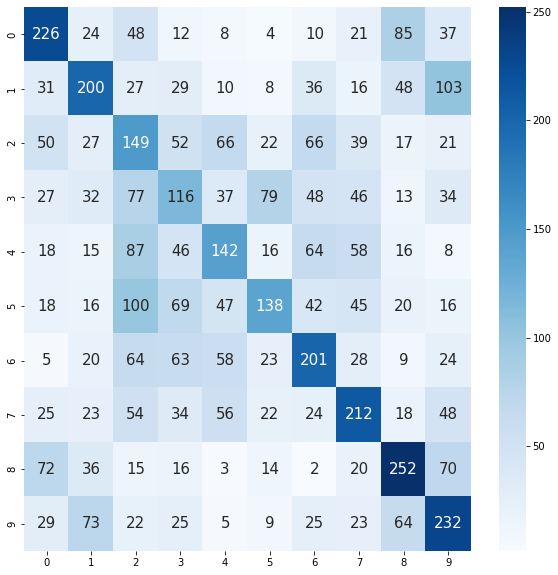

In [14]:
# Affichage de la matrice de confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(y_test,y_predict), cmap='Blues', annot=True, annot_kws={'size': 15}, fmt='g')

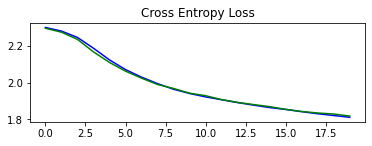

In [15]:
# pour mieux interpreter les resultat on va tracer les courbes d'apprentissage 
# affichage de la courbe de la fonction de perte
plt.subplot(212)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color ='blue', label = 'train')
plt.plot(history.history['val_loss'], color ='green', label = 'test')

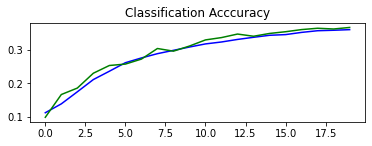

In [16]:
# affichage de la courbe de la fonction de perte
plt.subplot(212)
plt.title('Classification Acccuracy')
plt.plot(history.history['accuracy'], color ='blue', label = 'train')
plt.plot(history.history['val_accuracy'], color ='green', label = 'test')